In [2]:
from google.colab import drive
drive.mount('/content/drive')
base_dir = "/content/drive/MyDrive/ML Lab Project/Dataset"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import seaborn as sns

In [4]:
categories = os.listdir("/content/drive/MyDrive/ML Lab Project/Dataset")
print("Categories:", categories)

Categories: ['Bus', 'Car', 'Truck', 'motorcycle']


In [5]:
image_size = (128, 128)
images = []
labels = []

for category in categories:
    class_index = categories.index(category)
    category_path = os.path.join("/content/drive/MyDrive/ML Lab Project/Dataset", category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        try:
            img = load_img(img_path, target_size=image_size)
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(class_index)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")

images = np.array(images) / 255.0  # Normalize pixel values
labels = np.array(labels)

print(f"Loaded {len(images)} images.")

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Loaded 400 images.


In [6]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

Train: (256, 128, 128, 3), Validation: (64, 128, 128, 3), Test: (80, 128, 128, 3)


In [7]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(categories))
y_val = tf.keras.utils.to_categorical(y_val, num_classes=len(categories))
y_test = tf.keras.utils.to_categorical(y_test, num_classes=len(categories))

In [8]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

In [9]:
model_dense = Sequential([
    Flatten(input_shape=(128, 128, 3)),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

model_dense.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Training Dense Model...")
history_dense = model_dense.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=10
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training Dense Model...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 249ms/step - accuracy: 0.2492 - loss: 19.1383 - val_accuracy: 0.3281 - val_loss: 10.1627
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 310ms/step - accuracy: 0.3108 - loss: 20.3097 - val_accuracy: 0.2812 - val_loss: 7.3343
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 364ms/step - accuracy: 0.2763 - loss: 11.2244 - val_accuracy: 0.2188 - val_loss: 2.7262
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 223ms/step - accuracy: 0.2866 - loss: 4.5576 - val_accuracy: 0.2344 - val_loss: 1.6724
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 219ms/step - accuracy: 0.2035 - loss: 1.7192 - val_accuracy: 0.2656 - val_loss: 1.3888
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 220ms/step - accuracy: 0.2479 - loss: 1.3892 - val_accuracy: 0.2344 - val_loss: 1.4262
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 369ms/step - accuracy: 0.3099 - loss: 1.4075 - val_accuracy: 0.2500 - val_loss: 1.3937
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 222ms/step - accuracy: 0.2327 - loss: 1.4292 - val_accuracy: 0.2656 - val_loss: 1.3920

In [10]:
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Training CNN Model...")
history_cnn = model_cnn.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=10
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training CNN Model...
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.2784 - loss: 4.7829 - val_accuracy: 0.2344 - val_loss: 1.4930
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 866ms/step - accuracy: 0.2627 - loss: 1.4324 - val_accuracy: 0.2812 - val_loss: 1.3607
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.2740 - loss: 1.3441 - val_accuracy: 0.3438 - val_loss: 1.3325
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.3896 - loss: 1.2742 - val_accuracy: 0.3594 - val_loss: 1.4219
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 824ms/step - accuracy: 0.4035 - loss: 1.2545 - val_accuracy: 0.3438 - val_loss: 1.4203
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4566 - loss: 1.2033 - val_accuracy: 0.3125 - val_loss: 1.3273
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 848ms/step - accuracy: 0.5167 - loss: 1.1510 - val_accuracy: 0.3438 - val_loss: 1.6129
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4845 - loss: 1.1688 - val_accuracy: 0.4375 

Evaluating Dense Model...
Dense Model Test Accuracy: 0.24
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
              precision    recall  f1-score   support

         Bus       0.00      0.00      0.00        26
         Car       0.23      0.94      0.37        18
       Truck       0.33      0.11      0.17        18
  motorcycle       0.00      0.00      0.00        18

    accuracy                           0.24        80
   macro avg       0.14      0.26      0.13        80
weighted avg       0.13      0.24      0.12        80



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


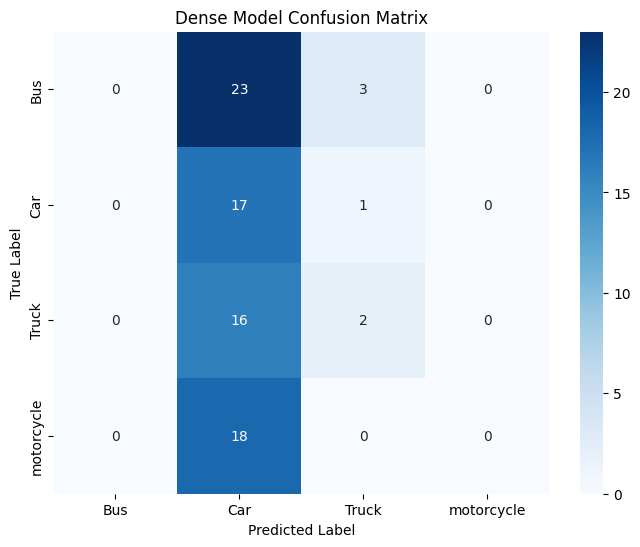

Evaluating CNN Model...
CNN Model Test Accuracy: 0.49
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step
              precision    recall  f1-score   support

         Bus       0.71      0.19      0.30        26
         Car       0.45      0.28      0.34        18
       Truck       0.46      0.67      0.55        18
  motorcycle       0.47      0.94      0.63        18

    accuracy                           0.49        80
   macro avg       0.53      0.52      0.46        80
weighted avg       0.54      0.49      0.44        80



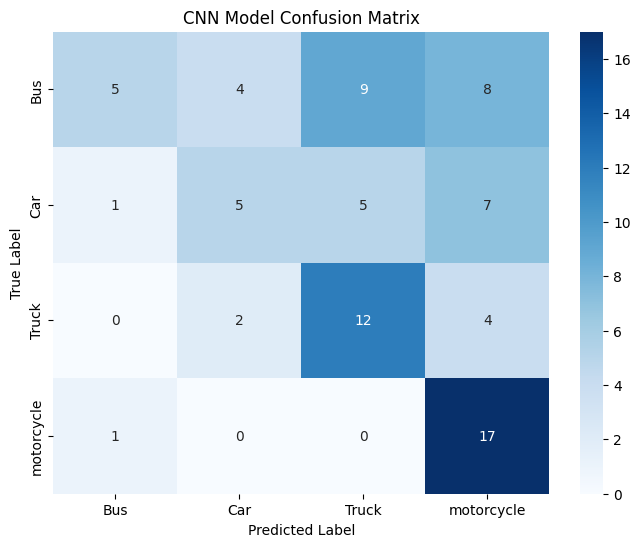

In [11]:
def evaluate_model(model, X_test, y_test, model_name):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"{model_name} Test Accuracy: {accuracy:.2f}")
    y_pred = np.argmax(model.predict(X_test), axis=1)
    y_true = np.argmax(y_test, axis=1)
    print(classification_report(y_true, y_pred, target_names=categories))
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=categories, yticklabels=categories, cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

print("Evaluating Dense Model...")
evaluate_model(model_dense, X_test, y_test, "Dense Model")

print("Evaluating CNN Model...")
evaluate_model(model_cnn, X_test, y_test, "CNN Model")

In [12]:
model_dense.save("vehicle_dense_model.h5")
model_cnn.save("vehicle_cnn_model.h5")

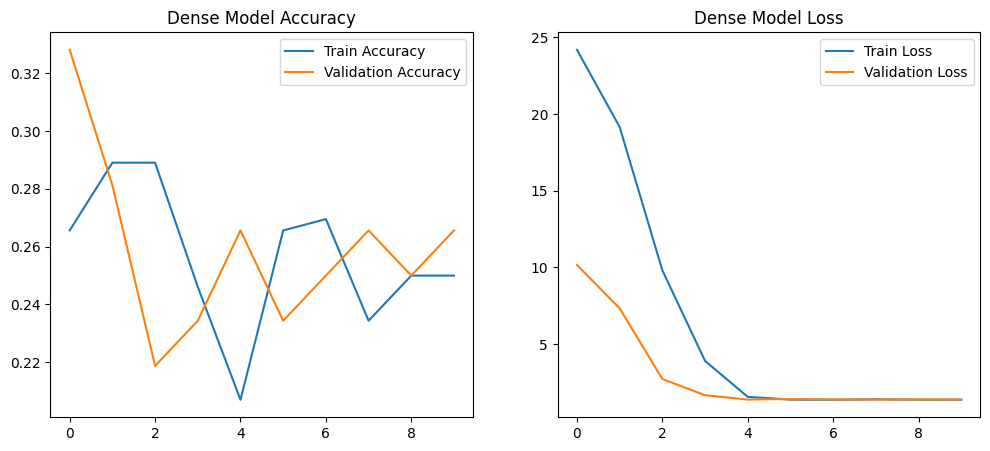

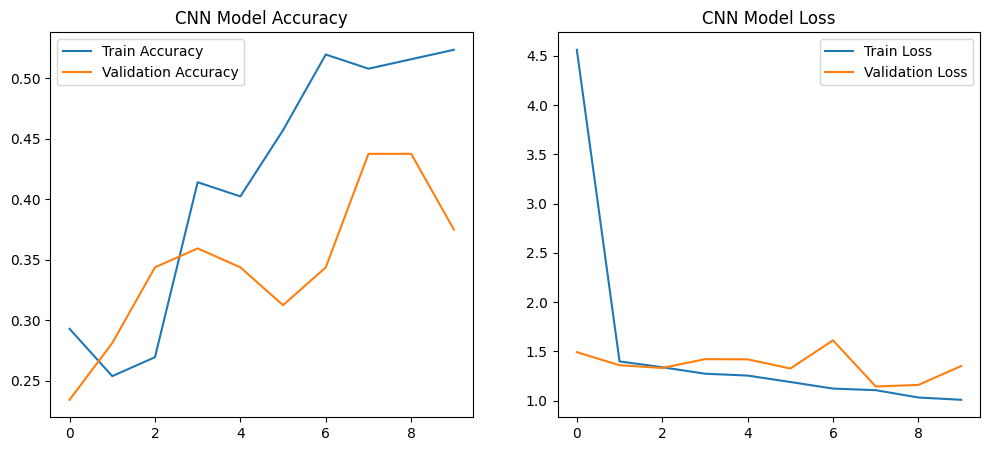

In [13]:
def plot_history(history, title):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"{title} Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"{title} Loss")
    plt.legend()
    plt.show()

plot_history(history_dense, "Dense Model")
plot_history(history_cnn, "CNN Model")